## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions
using LinearAlgebra

### Loading the banana dataset from OpenML

In [2]:
kernel = SqExponentialKernel()
x = range(0, 10, length=50)
K = kernelmatrix(kernel, x)
f = rand(MvNormal(K + 1e-8I)) # Sample a random GP
y = rand.(Bernoulli.(AGP.logistic.(f)))
y_sign = sign.(y .- 0.5)

50-element Vector{Float64}:
 -1.0
 -1.0
  1.0
 -1.0
  1.0
  1.0
 -1.0
 -1.0
 -1.0
 -1.0
  ⋮
 -1.0
  1.0
 -1.0
  1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0

### We create a function to visualize the data

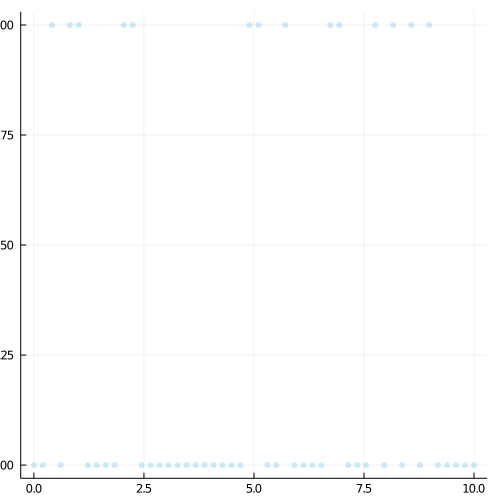

In [3]:
function plot_data(x, y; size=(300,500))
    Plots.scatter(x,
                y,
                alpha=0.2,
                markerstrokewidth=0.0,
                lab="",
                size=size
            )
end
plot_data(x, y; size = (500, 500))

### Run the variational gaussian process approximation

In [4]:
@info "Running full model"
mfull = VGP(x, y_sign,
            kernel,
            LogisticLikelihood(),
            AnalyticVI(),
            optimiser = false
            )
@time train!(mfull, 5)

┌ Info: Running full model
└ @ Main.##475 string:1
  0.623160 seconds (1.13 M allocations: 66.107 MiB, 99.44% compilation time)


### We can also create a sampling based model

In [5]:
@info "Sampling from model"
mmcmc = MCGP(x, y,
            kernel,
            LogisticLikelihood(),
            GibbsSampling(),
            optimiser = false
            )
m = mmcmc
@time samples = sample(mmcmc, 1000)

┌ Info: Sampling from model
└ @ Main.##475 string:1
Sampling with Gibbs Sampler   0%|                       |  ETA: N/A
Sampling with Gibbs Sampler   0%|▏                      |  ETA: 0:04:09
Sampling with Gibbs Sampler   1%|▎                      |  ETA: 0:02:06
Sampling with Gibbs Sampler   1%|▍                      |  ETA: 0:01:24
Sampling with Gibbs Sampler   2%|▍                      |  ETA: 0:01:03
Sampling with Gibbs Sampler   2%|▌                      |  ETA: 0:00:50
Sampling with Gibbs Sampler   3%|▋                      |  ETA: 0:00:42
Sampling with Gibbs Sampler   3%|▊                      |  ETA: 0:00:36
Sampling with Gibbs Sampler   4%|▉                      |  ETA: 0:00:31
Sampling with Gibbs Sampler   4%|█                      |  ETA: 0:00:27
Sampling with Gibbs Sampler   5%|█                      |  ETA: 0:00:25
Sampling with Gibbs Sampler   5%|█▏                     |  ETA: 0:00:22
Sampling with Gibbs Sampler   5%|█▎                     |  ETA: 0:00:20
Sampling with Gi

1000-element Vector{Vector{Vector{Float64}}}:
 [[0.4678651814985932, 0.38125796317337257, 0.32229962971239934, 0.2638914905767905, 0.16666048809478617, -0.014830377246141668, -0.2932162069457197, -0.624245431435385, -1.0029739356420584, -1.350097943988251  …  0.48973330650805186, 0.3955522297440435, 0.2977491389644434, 0.1728519433884091, 0.0308811065963569, -0.12524278436067915, -0.26121347292675534, -0.38053628666511186, -0.45787154777499794, -0.5143172734903463]]
 [[-0.06599682669570822, -0.12524627083213086, -0.22252155859777384, -0.2666009101397948, -0.26398737668215844, -0.21720649923766622, -0.09080496604749982, 0.025249986969925864, 0.1096674910285258, 0.06391640117930264  …  -1.020038053711547, -1.1162360842105268, -1.2047798482544054, -1.2374590863016937, -1.2945217253492545, -1.2877060978156263, -1.2193184017115524, -1.0952266545569824, -0.8807512430304288, -0.620826636901469]]
 [[-0.19832843559102234, -0.5433208422630895, -0.7904063956999479, -0.948651864666815, -0.99350199

### We can now visualize the results of both models

### We first plot the latent function f (truth, the VI estimate, the samples)

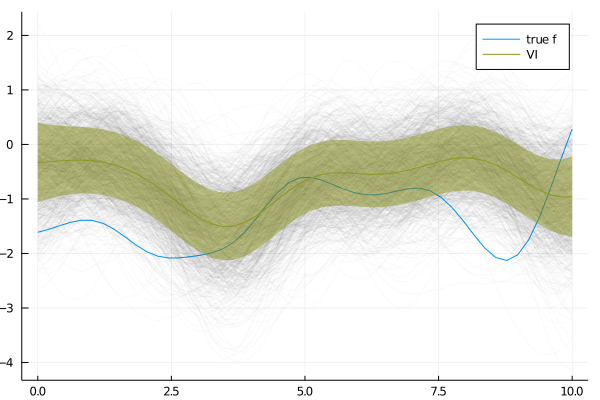

In [6]:
p1 = plot(x, f, label="true f")
plot!(x, samples, label="", color=:black, alpha=0.02, lab="")
plot!(x, mean(mfull[1]), ribbon=sqrt.(var(mfull[1])), label="VI")

### And we can also plot the predictions vs the data

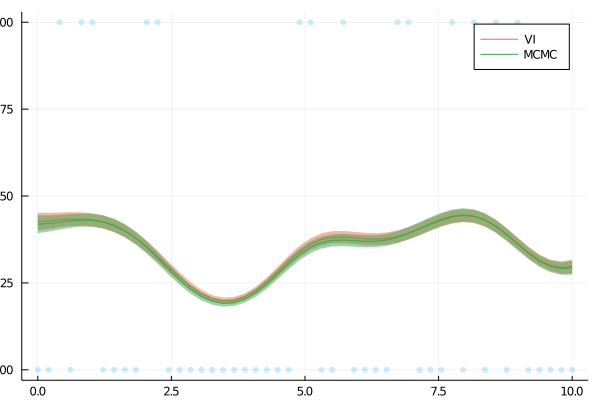

In [7]:
p2 = plot_data(x, y; size=(600,400))
μ_vi, σ_vi = proba_y(mfull, x)
plot!(x, μ_vi; ribbon=σ_vi, label="VI")
μ_mcmc, σ_mcmc = proba_y(mmcmc, x)
plot!(x, μ_mcmc; ribbon=σ_mcmc, label="MCMC")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*